In [224]:
%%writefile /home/melinda_yang/projects/review_EMH/calc_admix_EUR.py
import plotting_funcs as pf

outs = ["Mbuti","Chimp"]
asn=["Clovis","Mixe","Surui","Han","Ami","Tianyuan"]
eur=["Kostenki14","Yana_old","Yana_old2","GoyetQ116-1","Ostuni1",
    "ElMiron","Villabruna","Bichon","Loschbour","LaBrana1",
    "Hungarian.KO1","Malta1","AfontovaGora3","Karelia","Motala12",
     "Satsurblia","Kotias"]

pD="/home/melinda_yang/data/2.2M/"
outpd="/home/melinda_yang/projects/review_EMH/"
fh="UPA_all8"
#bsf,bsfsubset=(0,'all')
bsf,bsfsubset=(pD+fh+".transi.snp",'transv')
for myp4 in outs:      
    p1,p2,p3,p4 = (eur,"Vestonice16",asn,myp4)
    subset = bsfsubset+'.'+"ANCEUR"+'_'+p2+'_'+"ASNAMER"+'_'+p4
    mytups = [(i,p2,j,p4,'p2_'+i) for i in p1 for j in p3]
    pf.runD(p1,p3,mytups,pD,fh,subset,(0,2),(0,),fixed=(0,p2,0,p4),
           badsnpfile=bsf,outpd=outpd)  
    

Overwriting /home/melinda_yang/projects/review_EMH/calc_admix_EUR.py


In [226]:
%%writefile /home/melinda_yang/projects/review_EMH/calc_EAS_EUR.py
import plotting_funcs as pf

outs = ["Mbuti","Chimp"]
asn=["Han","Ami","Dai"]
anc=["UstIshim","Oase1","Tianyuan","Kostenki14","Yana_old","Yana_old2","GoyetQ116-1","Vestonice16","Ostuni1",
    "ElMiron","Villabruna","Bichon","Loschbour","LaBrana1",
    "Hungarian.KO1","Malta1","AfontovaGora3","Karelia","Motala12",
     "Satsurblia","Kotias"]

pD="/home/melinda_yang/data/2.2M/"
outpd="/home/melinda_yang/projects/review_EMH/"
fh="UPA_all8"
#bsf,bsfsubset=(0,'all')
bsf,bsfsubset=(pD+fh+".transi.snp",'transv')
for myp4 in outs:      
    p1,p2,p3,p4 = ("French",asn,anc,myp4)
    subset = bsfsubset+'.'+p1+'_'+"PDEAS"+'_'+"ANC"+'_'+p4
    mytups = [(p1,i,j,p4,'p2_'+i) for i in p2 for j in p3]
    pf.runD(p2,p3,mytups,pD,fh,subset,(1,2),(0,),fixed=(p1,0,0,p4),
           badsnpfile=bsf,outpd=outpd)  
    

Overwriting /home/melinda_yang/projects/review_EMH/calc_EAS_EUR.py


In [227]:
%%writefile /home/melinda_yang/projects/review_EMH/calc_BASALEUR.py
import plotting_funcs as pf

outs = ["Mbuti","Chimp"]
asn=["Han","Ami","Dai"]
anc=["Kostenki14","Tianyuan","Yana_old","Yana_old2","GoyetQ116-1","Vestonice16","Ostuni1",
    "ElMiron","Villabruna","Bichon","Loschbour","LaBrana1",
    "Hungarian.KO1","Malta1","AfontovaGora3","Karelia","Motala12",
     "Satsurblia","Kotias"]

pD="/home/melinda_yang/data/2.2M/"
outpd="/home/melinda_yang/projects/review_EMH/"
fh="UPA_all8"
#bsf,bsfsubset=(0,'all')
bsf,bsfsubset=(pD+fh+".transi.snp",'transv')
for myp4 in outs:      
    p1,p2,p3,p4 = (anc,asn,"UstIshim",myp4)
    subset = bsfsubset+'.'+"ANC"+'_'+"PDEAS"+'_'+p3+'_'+p4
    mytups = [(i,j,p3,p4,'p2_'+i) for i in p1 for j in p2]
    pf.runD(p1,p2,mytups,pD,fh,subset,(0,1),(0,),fixed=(0,0,p3,p4),
           badsnpfile=bsf,outpd=outpd)  
    

Overwriting /home/melinda_yang/projects/review_EMH/calc_BASALEUR.py


In [228]:

pD="/home/melinda_yang/projects/review_EMH/"
fh="UPA_all8.D."
tv="transv"
grep result ${pD}${fh}${tv}.French_PDEAS_ANC_Mbuti.log | awk '{print $3,$4,$6,$8}' > ${pD}${tv}.EURASN.txt
grep result ${pD}${fh}${tv}.ANCEUR_Vestonice16_ASNAMER_Mbuti.log | awk '{print $2,$4,$6,$8}' > ${pD}${tv}.ASN_f.txt
grep result ${pD}${fh}${tv}.ANC_PDEAS_UstIshim_Mbuti.log | awk '{print $2,$3,$6,$8}' > ${pD}${tv}.BASALEUR.txt

SyntaxError: invalid syntax (<ipython-input-228-cdf113bf74dd>, line 5)

In [1]:
% matplotlib inline


pop1=["Han"]
pop2=["UstIshim","Oase1","Tianyuan","Kostenki14","GoyetQ116-1","Vestonice16","Ostuni1",
    "ElMiron","Villabruna","Bichon","Loschbour","LaBrana1",
    "Hungarian.KO1","Malta1","AfontovaGora3","Karelia","Motala12",
     "Satsurblia","Kotias"]

def makefplot(fh,p1,p2,pd="",hdividers=[],outfh="",Dlim=(0,0),
              figsize=(0,0),markersize=5,color="blue",fs=13,
              title="",xlab="D",ylab="",offset=0.05):
    ## Take text file with names of varying population, D-statistic, Z-score
    ## Ignores past three columns, separated by tabs
    ## Ignores any lines with "#" at the beginning.
    ## Makes a png file and returns printed statement with name of png file.
    
    ### fh = Name of filehandle, include suffix!
    ### pd="": Default is current directory, otherwise, specify directory here. 
    ### hdividers=[]: If list of numbers, place a horizontal gray line 
    ###                just below this individual in list (indexed by zero)
    ### outfh="": Default is fh name, but will change to string given here.
    ### Dlim=(0,0): Default is 3SD away from min and max D in table;
    ###              otherwise specify minimum and maximum values for D in tuple as (min,max).
    ### figsize=(0,0): If default, then matplotlib makes judgment call. 
    ###                 Otherwise, write tuple (width,height), in inches I think.
    ### markersize=7: Size of marker, width or error bars are relative to this number.
    ### color="blue": Specify color using matplotlib color strings (ex. red, lightgray, brown, etc.)
    ### fs=13: Specify font size of title and labels.
    ### title=""; xlab="D", ylab="": Specify title, x-label, and y-label
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ##READ IN DATA
    myfile=open(pd+fh,'r')
    names1,names2,Ds,Zs=[],[],[],[]
    for line in myfile: 
        if line[0]=="#": continue
        x=line.split()
        if x[1] not in pop2: continue
        if x[0] not in names1: names1.append(x[0])
        if x[1] not in names2: names2.append(x[1])
        Ds.append(float(x[2]))
        Zs.append(float(x[3]))
    myfile.close()
    
    myDary=np.zeros((len(names1),len(names2)))
    
    ##CALC STDEV
    Ds=np.array(Ds)
    Zs=np.array(Zs)
    Ds=np.reshape(Ds,(len(names1),len(names2)))
    Zs=np.reshape(Zs,(len(names1),len(names2)))
    myys=np.arange(len(names2))+0.5
    SEs=Ds/Zs
    
    
    for myindex,p1 in enumerate(pop1):
        subDs=Ds[myindex,:][::-1]
        subSEs=SEs[myindex,:][::-1]
        names2=names2[::-1]
        ##MAKE PLOT
        if figsize==(0,0): fig = plt.figure()
        else: fig = plt.figure(figsize=figsize)
        ax1=fig.add_subplot(1,1,1)


        ax1.axvline(x=0, ls='dashed', c='lightgray')
        for mypos in hdividers:ax1.axhline(y=mypos+0.2,c='lightgray')

        ##PLOT D values and error bars
        ax1.plot(subDs,myys,'o',markersize=markersize,color='black')
        ax1.errorbar(subDs,myys,xerr=subSEs,color=color,fmt='o',capthick=0,markersize=markersize-2,linewidth=markersize-1,ecolor='darkgrey')
        ax1.errorbar(subDs,myys,xerr=3*subSEs,color=color,fmt='o',capthick=0,markersize=markersize-2,linewidth=markersize-3,ecolor='darkgrey')

        if Dlim==(0,0): ax1.set_xlim(min(subDs-5*subSEs),max(subDs+4*subSEs))
        else: ax1.set_xlim(Dlim[0],Dlim[1])
        ax1.set_ylim(0,len(names2)+1)
        xlabel = ax1.get_xticks().tolist()
        ax1.set_xticklabels(xlabel,rotation=45,fontsize=fs)
        ax1.xaxis.set_ticks_position('bottom')
        ax1.set_title(title,fontsize=fs)
        ax1.set_xlabel(xlab,fontsize=fs)
        ax1.set_ylabel(ylab,fontsize=fs)
        #ax1.set_yticks(myys)
        ax1.set_yticks([])
        ax1.set_yticklabels([""]*len(names2),fontsize=fs)
        
        #ax1.text(Dlim[0]-0.03,len(names2)/2.0,"Asian",rotation=90,verticalalignment="center",fontsize=fs)
        #ax1.text(Dlim[1]+0.01,len(names2)/2.0,"European",rotation=270,verticalalignment="center",fontsize=fs)
        ax1.text(Dlim[0]+0.005,len(names2)+0.7,"Asian",verticalalignment="center",fontsize=fs-4)
        ax1.text(Dlim[1]-0.005,len(names2)+0.7,"European",horizontalalignment="right",verticalalignment="center",fontsize=fs-4)
        ax1.text(0,len(names2)+0.7,"Neither",horizontalalignment="center",verticalalignment="center",fontsize=fs-4)
        for ind2,n2 in enumerate(names2): 
            if n2 in ["UstIshim","Oase1"]: n2+="*"
            ax1.text(subDs[ind2]-2*subSEs[ind2],ind2+0.7,n2,fontsize=fs-5,horizontalalignment="center")
        plt.show()
        
        ##SEND PLOT TO FILE
        #plotfilename=pd+fh[:-4]+".png" if outfh=="" else pd+outfh
        #plt.savefig()
        #fig.savefig(plotfilename,bbox_inches='tight')
        #return "Made plot %s" % plotfilename

    
pD="/home/melinda_yang/projects/review_EMH/"
fh="all.EURASN.txt"
ll= makefplot(pD+fh,pop1,pop2,hdividers=[6],figsize=(3,6.5),Dlim=(-0.15,0.15),color="black", title="Asian or European?")

IOError: [Errno 2] No such file or directory: '/home/melinda_yang/projects/review_EMH/all.EURASN.txt'

[-0.0028, -0.0034, 0.013, 0.0329, 0.0131, 0.0188, 0.0168, 0.0133, 0.0084, 0.0111, 0.0246, 0.0103, 0.0241, 0.0121, 0.0212, 0.0134, 0.0187, 0.0036, 0.0291, 0.0204, 0.0368, 0.0263, 0.036, 0.0143, 0.0208, -0.0]
[  0.6   1.6   2.6   3.6   4.6   5.6   6.6   7.6   8.6   9.6  10.6  11.6
  12.6]
[  0.35   1.35   2.35   3.35   4.35   5.35   6.35   7.35   8.35   9.35
  10.35  11.35  12.35]


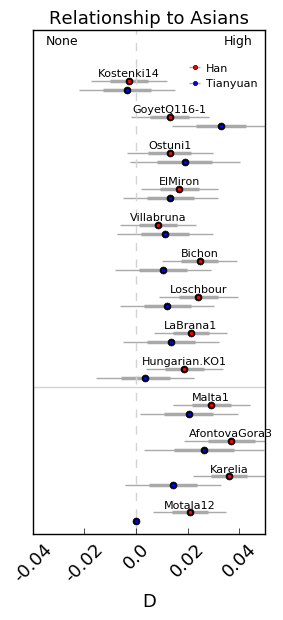

In [231]:
% matplotlib inline


pop2=["Tianyuan","Han"]
pop1=["Kostenki14","GoyetQ116-1","Ostuni1",
    "ElMiron","Villabruna","Bichon","Loschbour","LaBrana1",
    "Hungarian.KO1","Malta1","AfontovaGora3","Karelia","Motala12",]
     #"Satsurblia","Kotias"]

def makefplot(fh,p1,p2,pd="",hdividers=[],outfh="",Dlim=(0,0),
              figsize=(0,0),markersize=5,color="blue",fs=13,
              title="",xlab="D",ylab="",offset=0.05):
    import numpy as np
    import matplotlib.pyplot as plt
    
    ##READ IN DATA
    myfile=open(pd+fh,'r')
    names1,names2,Ds,Zs=[],[],[],[]
    for line in myfile: 
        if line[0]=="#": continue
        x=line.split()
        if x[1] not in pop2: continue
        if x[0] not in pop1: continue
        if x[0] not in names1: names1.append(x[0])
        if x[1] not in names2: names2.append(x[1])
        Ds.append(float(x[2]))
        Zs.append(float(x[3]))
    myfile.close()
    #print names1, names2
    print Ds
    myDary=np.zeros((len(names1),len(names2)))
    
    ##CALC STDEV
    Ds=np.array(Ds)
    Zs=np.array(Zs)
    Ds=np.reshape(Ds,(len(names1),len(names2)))
    Zs=np.reshape(Zs,(len(names1),len(names2)))
    myys=[np.arange(len(names1))+0.6,
          np.arange(len(names1))+0.35]
    SEs=Ds/Zs
    colors=["red","blue","brown"]
    
    ##MAKE PLOT
    names1=names1[::-1]
    if figsize==(0,0): fig = plt.figure()
    else: fig = plt.figure(figsize=figsize)
    ax1=fig.add_subplot(1,1,1)
    ax1.axvline(x=0, ls='dashed', c='lightgray')
    for mypos in hdividers:ax1.axhline(y=mypos+0.1,c='lightgray')
    myplots=[0,0]
    for myindex,p2 in enumerate(pop2):
        print myys[myindex]
        subDs=Ds[:,myindex][::-1]
        subSEs=SEs[:,myindex][::-1]        
        
        ##PLOT D values and error bars
        myplots[myindex]=ax1.plot(subDs,myys[myindex],'o',markersize=markersize,color='black')
        myplots[myindex]=ax1.errorbar(subDs,myys[myindex],xerr=subSEs,color=colors[myindex],fmt='o',capthick=0,markersize=markersize-2,linewidth=markersize-2.5,ecolor='darkgrey')
        myplots[myindex]=ax1.errorbar(subDs,myys[myindex],xerr=2*subSEs,color=colors[myindex],fmt='o',capthick=0,markersize=markersize-2,linewidth=markersize-4,ecolor='darkgrey')

    if Dlim==(0,0): ax1.set_xlim(min(subDs-5*subSEs),max(subDs+4*subSEs))
    else: ax1.set_xlim(Dlim[0],Dlim[1])
    ax1.set_ylim(0,len(names1)+1)
    xlabel = ax1.get_xticks().tolist()
    ax1.set_xticklabels(xlabel,rotation=45,fontsize=fs)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(title,fontsize=fs)
    ax1.set_xlabel(xlab,fontsize=fs)
    ax1.set_ylabel(ylab,fontsize=fs)
    #ax1.set_yticks(myys)
    ax1.set_yticks([])
    ax1.set_yticklabels([""]*len(names1),fontsize=fs)

    #ax1.text(Dlim[0]-0.03,len(names2)/2.0,"Asian",rotation=90,verticalalignment="center",fontsize=fs)
    #ax1.text(Dlim[1]+0.01,len(names2)/2.0,"European",rotation=270,verticalalignment="center",fontsize=fs)
    ax1.text(Dlim[0]+0.005,len(names1)+0.7,"None",verticalalignment="center",fontsize=fs-4)
    ax1.text(Dlim[1]-0.005,len(names1)+0.7,"High",horizontalalignment="right",verticalalignment="center",fontsize=fs-4)
    for ind2,n2 in enumerate(names1): 
        ax1.text(Ds[:,0][::-1][ind2],ind2+0.72,n2,fontsize=fs-5,horizontalalignment="center")
    ax1.legend(myplots,["Han","Tianyuan"],loc=(0.63,0.875),fontsize=fs-5,numpoints=1,frameon=False,
              handletextpad=0.005)
    plt.show()
        
        ##SEND PLOT TO FILE
        #plotfilename=pd+fh[:-4]+".png" if outfh=="" else pd+outfh
        #plt.savefig()
        #fig.savefig(plotfilename,bbox_inches='tight')
        #return "Made plot %s" % plotfilename

    
pD="/home/melinda_yang/projects/review_EMH/"
fh="transv.ASN_f.txt"
ll= makefplot(pD+fh,pop1,pop2,hdividers=[4],figsize=(3,6.5),Dlim=(-0.04,0.05),markersize=5,title="Relationship to Asians")

[0.0001, 0.0114, 0.0019, -0.0028, 0.0003, -0.003, -0.0014, -0.0002, -0.0048, -0.0157, 0.0029, -0.0083, -0.0127, -0.0066, -0.0241, -0.0259]
[  0.6   1.6   2.6   3.6   4.6   5.6   6.6   7.6   8.6   9.6  10.6  11.6
  12.6  13.6  14.6  15.6]


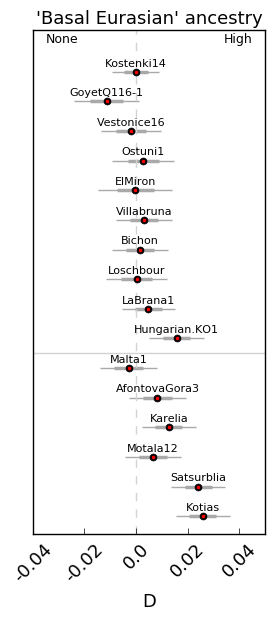

In [232]:
% matplotlib inline


pop2=["Han"]
pop1=["Kostenki14","GoyetQ116-1","Vestonice16","Ostuni1",
    "ElMiron","Villabruna","Bichon","Loschbour","LaBrana1",
    "Hungarian.KO1","Malta1","AfontovaGora3","Karelia","Motala12",
     "Satsurblia","Kotias"]

def makefplot(fh,p1,p2,pd="",hdividers=[],outfh="",Dlim=(0,0),
              figsize=(0,0),markersize=5,color="blue",fs=13,
              title="",xlab="D",ylab="",offset=0.05):
    import numpy as np
    import matplotlib.pyplot as plt
    
    ##READ IN DATA
    myfile=open(pd+fh,'r')
    names1,names2,Ds,Zs=[],[],[],[]
    for line in myfile: 
        if line[0]=="#": continue
        x=line.split()
        if x[1] not in pop2: continue
        if x[0] not in pop1: continue
        if x[0] not in names1: names1.append(x[0])
        if x[1] not in names2: names2.append(x[1])
        Ds.append(float(x[2]))
        Zs.append(float(x[3]))
    myfile.close()
    #print names1, names2
    print Ds
    myDary=np.zeros((len(names1),len(names2)))
    
    ##CALC STDEV
    Ds=np.array(Ds)
    Zs=np.array(Zs)
    Ds=-1*np.reshape(Ds,(len(names1),len(names2)))
    Zs=np.reshape(Zs,(len(names1),len(names2)))
    myys=[np.arange(len(names1))+0.6,
          np.arange(len(names1))+0.35]
    SEs=Ds/Zs
    colors=["red","blue","brown"]
    
    ##MAKE PLOT
    names1=names1[::-1]
    if figsize==(0,0): fig = plt.figure()
    else: fig = plt.figure(figsize=figsize)
    ax1=fig.add_subplot(1,1,1)
    ax1.axvline(x=0, ls='dashed', c='lightgray')
    for mypos in hdividers:ax1.axhline(y=mypos+0.1,c='lightgray')
    myplots=[0,0]
    for myindex,p2 in enumerate(pop2):
        print myys[myindex]
        subDs=Ds[:,myindex][::-1]
        subSEs=SEs[:,myindex][::-1]        
        
        ##PLOT D values and error bars
        myplots[myindex]=ax1.plot(subDs,myys[myindex],'o',markersize=markersize,color='black')
        myplots[myindex]=ax1.errorbar(subDs,myys[myindex],xerr=subSEs,color=colors[myindex],fmt='o',capthick=0,markersize=markersize-2,linewidth=markersize-2.5,ecolor='darkgrey')
        myplots[myindex]=ax1.errorbar(subDs,myys[myindex],xerr=2*subSEs,color=colors[myindex],fmt='o',capthick=0,markersize=markersize-2,linewidth=markersize-4,ecolor='darkgrey')

    if Dlim==(0,0): ax1.set_xlim(min(subDs-5*subSEs),max(subDs+4*subSEs))
    else: ax1.set_xlim(Dlim[0],Dlim[1])
    ax1.set_ylim(0,len(names1)+1)
    xlabel = ax1.get_xticks().tolist()
    ax1.set_xticklabels(xlabel,rotation=45,fontsize=fs)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(title,fontsize=fs)
    ax1.set_xlabel(xlab,fontsize=fs)
    ax1.set_ylabel(ylab,fontsize=fs)
    #ax1.set_yticks(myys)
    ax1.set_yticks([])
    ax1.set_yticklabels([""]*len(names1),fontsize=fs)

    #ax1.text(Dlim[0]-0.03,len(names2)/2.0,"Asian",rotation=90,verticalalignment="center",fontsize=fs)
    #ax1.text(Dlim[1]+0.01,len(names2)/2.0,"European",rotation=270,verticalalignment="center",fontsize=fs)
    ax1.text(Dlim[0]+0.005,len(names1)+0.7,"None",verticalalignment="center",fontsize=fs-4)
    ax1.text(Dlim[1]-0.005,len(names1)+0.7,"High",horizontalalignment="right",verticalalignment="center",fontsize=fs-4)
    for ind2,n2 in enumerate(names1): 
        ax1.text(Ds[:,0][::-1][ind2],ind2+0.8,n2,fontsize=fs-5,horizontalalignment="center")
    #ax1.legend(myplots,["Han","Tianyuan"],loc=(0.63,0.875),fontsize=fs-5,numpoints=1,frameon=False,
    #          handletextpad=0.005)
    plt.show()
        
        ##SEND PLOT TO FILE
        #plotfilename=pd+fh[:-4]+".png" if outfh=="" else pd+outfh
        #plt.savefig()
        #fig.savefig(plotfilename,bbox_inches='tight')
        #return "Made plot %s" % plotfilename

    
pD="/home/melinda_yang/projects/review_EMH/"
fh="all.BASALEUR.txt"
ll= makefplot(pD+fh,pop1,pop2,hdividers=[6],figsize=(3,6.5),Dlim=(-0.04,0.05),markersize=5,title="'Basal Eurasian' ancestry")